In [1]:
import os
from plan4grid import Launcher

In [2]:
env_name = "rte_case14_redisp"
scenario_id = 1
tactical_horizon = 1

Parameters of the agent:
	Tactical horizon: 1
	Time step: 5.0 minutes
	Solver: enhsp
	Debug mode: False

Properties of the grid:
	Generators:
		pmin: [0. 0. 0. 0. 0.]
		pmax: [150. 200.  70.  50. 300.]
		redispatchable: [ True  True False False  True]
		max_ramp_up: [ 5. 10.  0.  0. 10.]
		max_ramp_down: [ 5. 10.  0.  0. 10.]
		gen_cost_per_MW: [40. 70.  0.  0. 70.]
		slack: [False False False False  True]
		gen_to_subid: [1 2 5 7 0]
		gen_bus: [1 1 1 1 1]
	Storages:
		Emax: []
		Emin: []
		loss: []
		charging_efficiency: []
		discharging_efficiency: []
		storage_max_p_prod: []
		storage_max_p_absorb: []
		storage_marginal_cost: []
		storage_to_subid: []
		storage_bus: []
	Transmission lines:
		0: {'from_bus': 0, 'to_bus': 1, 'connected_status': True, 'max_flow': 83.56290435791016}
		1: {'from_bus': 0, 'to_bus': 4, 'connected_status': True, 'max_flow': 83.56290435791016}
		2: {'from_bus': 8, 'to_bus': 9, 'connected_status': True, 'max_flow': 76.59932708740234}
		3: {'from_bus': 8, 'to_

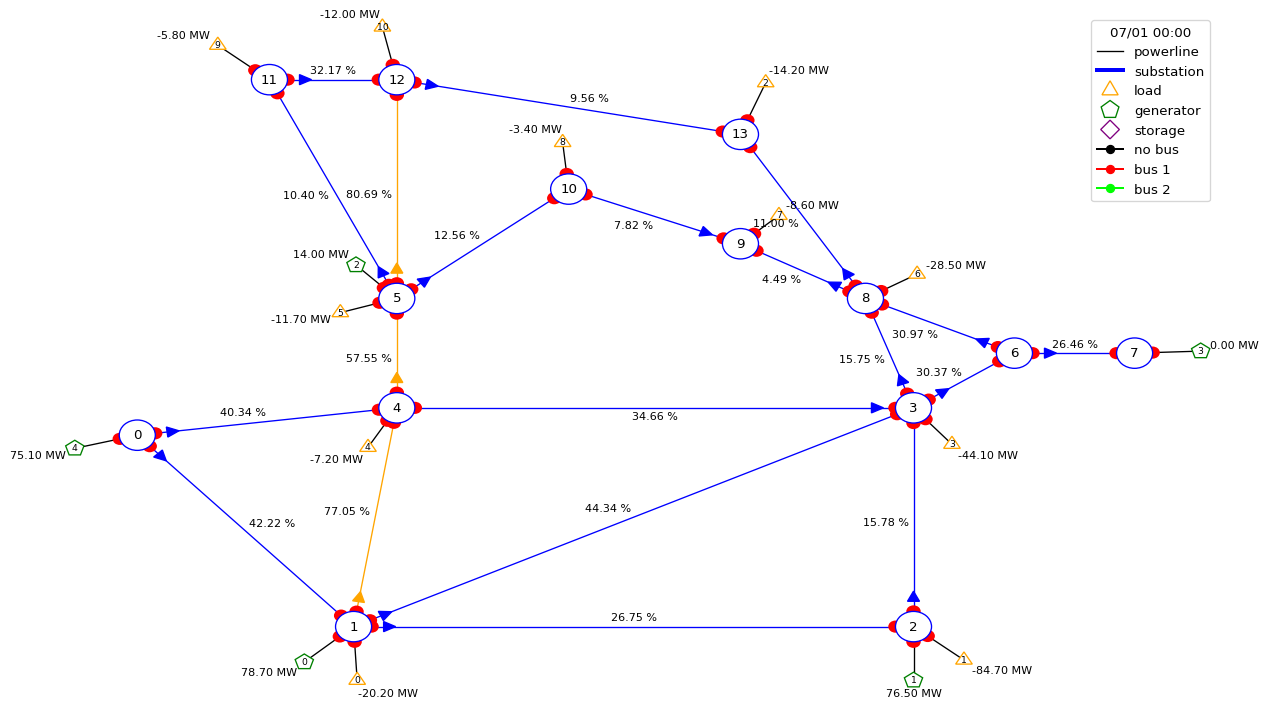


* Cumulative reward: 28931.78884124756


In [3]:
launcher = Launcher(env_name, scenario_id, tactical_horizon)
launcher.launch()